In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [35]:
df = pd.read_csv('../data/processed/df_merged.csv')

Estructura del nuevo dataframe:

In [36]:
print("Información del dataset unificado:")
df.info()

Información del dataset unificado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                500 non-null    int64  
 1   first_name             500 non-null    object 
 2   last_name              500 non-null    object 
 3   age                    500 non-null    int64  
 4   city                   500 non-null    object 
 5   reg_date               500 non-null    object 
 6   plan                   500 non-null    object 
 7   churn_date             34 non-null     object 
 8   total_minutes          500 non-null    float64
 9   total_messages         500 non-null    float64
 10  total_mb               500 non-null    float64
 11  messages_included      500 non-null    int64  
 12  mb_per_month_included  500 non-null    int64  
 13  minutes_included       500 non-null    int64  
 14  usd_monthly_pay        

## Variables Derviadas

Consumo extra:

In [37]:
df['extra_minutes'] = (df['total_minutes'] - df['minutes_included']).clip(lower=0) #Consumo de llamadas que excede lo incluido en el plan
df['extra_messages'] = (df['total_messages'] - df['messages_included']).clip(lower=0) #Cantidad de mensajes que excede lo incluido
df['extra_mb'] = (df['total_mb'] - df['mb_per_month_included']).clip(lower=0) #Cantidad de MB usados que exceden lo incluido

Cambiar todo a GB como dijo Erick:

In [38]:
df['extra_gb'] = df['extra_mb'] / 1024  # Usamos 1024 MB = 1 GB

Costo extra:

In [39]:
#Multiplicar el consumo extra por la tarifa 
df['extra_calls_cost'] = df['extra_minutes'] * df['usd_per_minute']
df['extra_messages_cost'] = df['extra_messages'] * df['usd_per_message']
df['extra_internet_cost'] = df['extra_gb'] * df['usd_per_gb']

#Sumar todos los costos extra para obtener el total extra:
df['total_extra_cost'] = df['extra_calls_cost'] + df['extra_messages_cost'] + df['extra_internet_cost']

Facturacion:

In [40]:
# Sumar el costo base del plan (usd_monthly_pay) y el costo extra
df['facturacion'] = df['usd_monthly_pay'] + df['total_extra_cost']

Ratios:

In [41]:
df['ratio_extra_minutes'] = df['extra_minutes'] / (df['total_minutes'] + 1e-5)  # evitar división por cero
df['ratio_extra_messages'] = df['extra_messages'] / (df['total_messages'] + 1e-5)
df['ratio_extra_mb'] = df['extra_mb'] / (df['total_mb'] + 1e-5)

## Nuevas features

Facturacion:

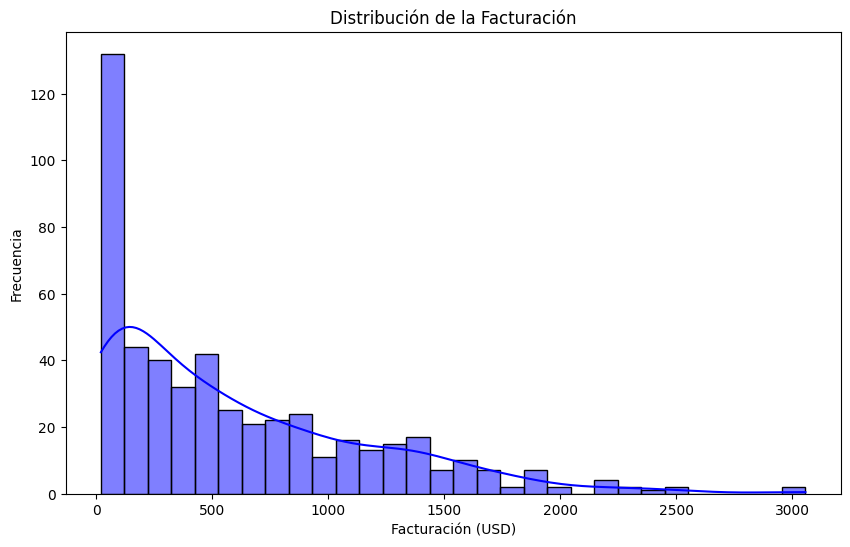

In [42]:
plt.figure(figsize=(10,6))
sns.histplot(df['facturacion'], bins=30, kde=True, color='blue')
plt.title("Distribución de la Facturación")
plt.xlabel("Facturación (USD)")
plt.ylabel("Frecuencia")
plt.show()

Matriz de correlacion:

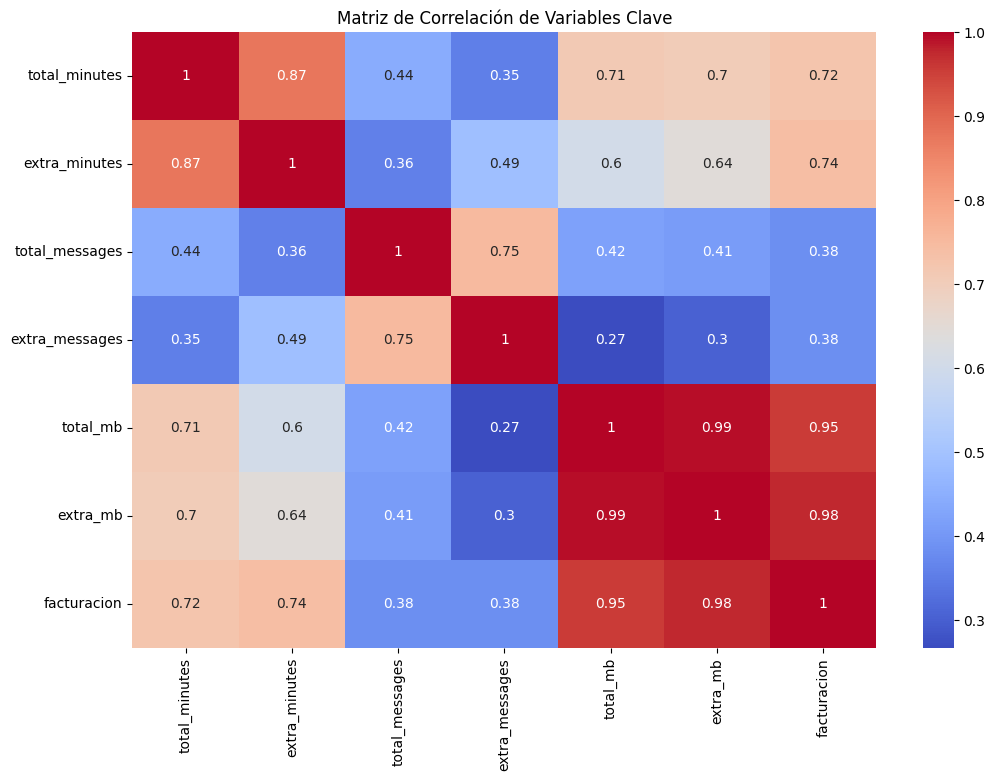

In [43]:
features_to_plot = ['total_minutes', 'extra_minutes', 'total_messages', 'extra_messages', 
                    'total_mb', 'extra_mb', 'facturacion']
plt.figure(figsize=(12,8))
sns.heatmap(df[features_to_plot].corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación de Variables Clave")
plt.show()

In [ ]:
df.to_csv('../data/ml/df_features.csv', index=False)
print("Feature Engineering completado. Dataset con features guardado en 'data/ml/df_features.csv'.")

Feature Engineering completado. Dataset con features guardado en 'data/ml/df_features.csv'.
